Using device: cpu
Upload your image


Saving Modi ji.png to Modi ji (1).png


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--r

Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/8a4288a76071f7280aedbdb3253bdb9e9d5d84bb/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Prompt Used: Keep the person same. Change only the background to snow mountains.


  0%|          | 0/50 [00:00<?, ?it/s]

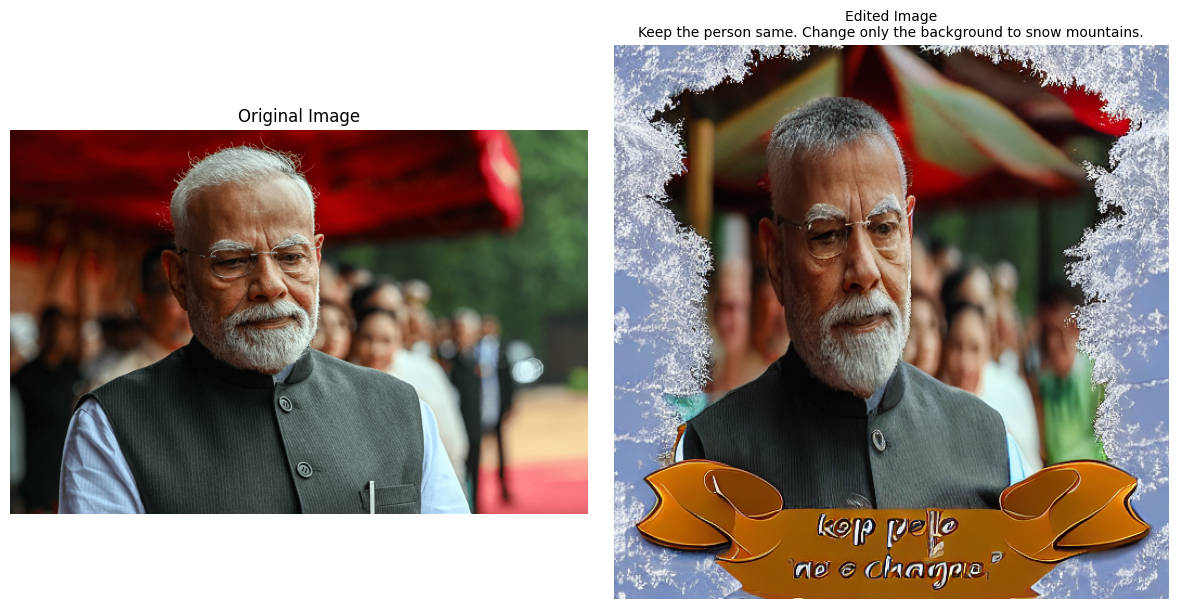

In [ ]:
# ================================
# 1️⃣ Install Libraries
# ================================
!pip install -q diffusers transformers accelerate safetensors

import torch
from diffusers import StableDiffusionInpaintPipeline
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import random

# ================================
# 2️⃣ Check Device (GPU / CPU)
# ================================
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using device:", device)

# ================================
# 3️⃣ Upload Image
# ================================
print("Upload your image")
uploaded = files.upload()

image_path = list(uploaded.keys())[0]
input_image = Image.open(image_path).convert("RGB")

# ================================
# 4️⃣ Create Simple Center Mask
# White = background change
# Black = keep subject
# ================================
mask = np.ones((input_image.height, input_image.width), dtype=np.uint8) * 255
h, w = mask.shape
mask[int(h*0.25):int(h*0.75), int(w*0.25):int(w*0.75)] = 0
mask_image = Image.fromarray(mask)

# ================================
# 5️⃣ Load Model (SAFE VERSION)
# ================================
model_id = "runwayml/stable-diffusion-inpainting"

if device == "cuda":
    pipe = StableDiffusionInpaintPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16
    ).to(device)
else:
    pipe = StableDiffusionInpaintPipeline.from_pretrained(
        model_id
    ).to(device)

# ================================
# 6️⃣ Random Prompts
# ================================
prompts = [
    "Keep the person same. Change only the background to a desert.",
    "Keep the person same. Change only the background to a beach.",
    "Keep the person same. Change only the background to snow mountains.",
    "Keep the person same. Change only the background to a forest.",
    "Keep the person same. Change only the background to a city street.",
    "Keep the person same. Change only the background to space.",
    "Keep the person same. Change only the background to a sunset sky.",
    "Keep the person same. Change only the background to a garden."
]

prompt = random.choice(prompts)
print("Prompt Used:", prompt)

# ================================
# 7️⃣ Generate Image
# ================================
result = pipe(
    prompt=prompt,
    image=input_image,
    mask_image=mask_image,
    guidance_scale=7.5
).images[0]

# ================================
# 8️⃣ Show Side-by-Side
# ================================
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(input_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(result)
plt.title(f"Edited Image\n{prompt}", fontsize=10)
plt.axis("off")

plt.tight_layout()
plt.show()
